In [1]:
#import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
train = pd.read_csv("TRAIN.csv")

In [3]:
#head
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
#shape
train.shape

(188340, 10)

In [5]:
#columns
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [6]:
#datatype of all the columns
train.dtypes

ID                object
Store_id           int64
Store_Type        object
Location_Type     object
Region_Code       object
Date              object
Holiday            int64
Discount          object
#Order             int64
Sales            float64
dtype: object

In [7]:
#typecasting date column
train["Date"] = pd.to_datetime(train["Date"], format="%Y-%m-%d")

In [8]:
#null check in the data
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
# year and week
train["week"] = train.Date.dt.week
train["month"] = train.Date.dt.month
train["year"] = train.Date.dt.year

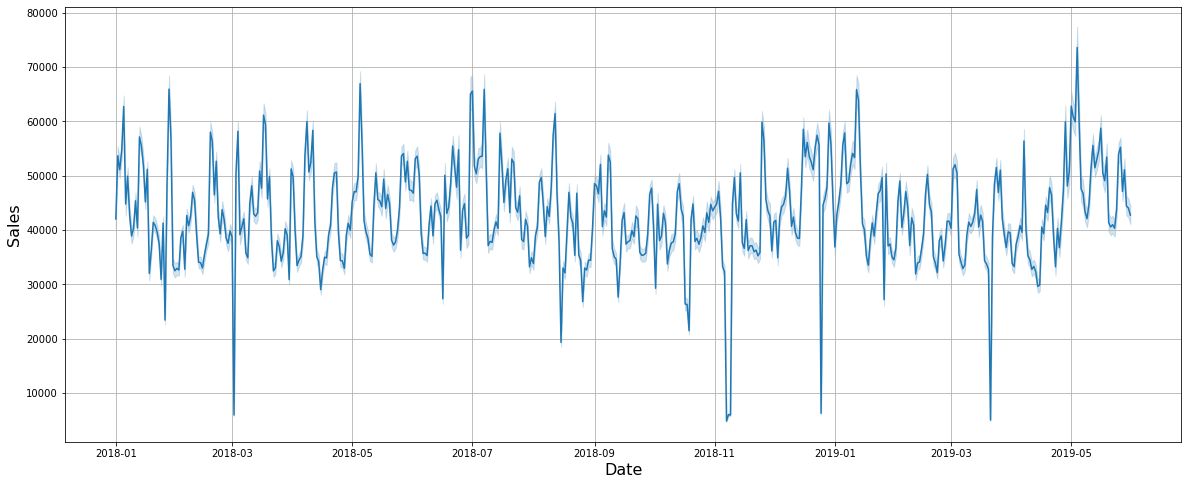

In [10]:
# plotting 2018 and 2019 sales data
plt.figure(figsize=(20,8))
sns.lineplot(train["Date"], train["Sales"])
plt.grid()
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

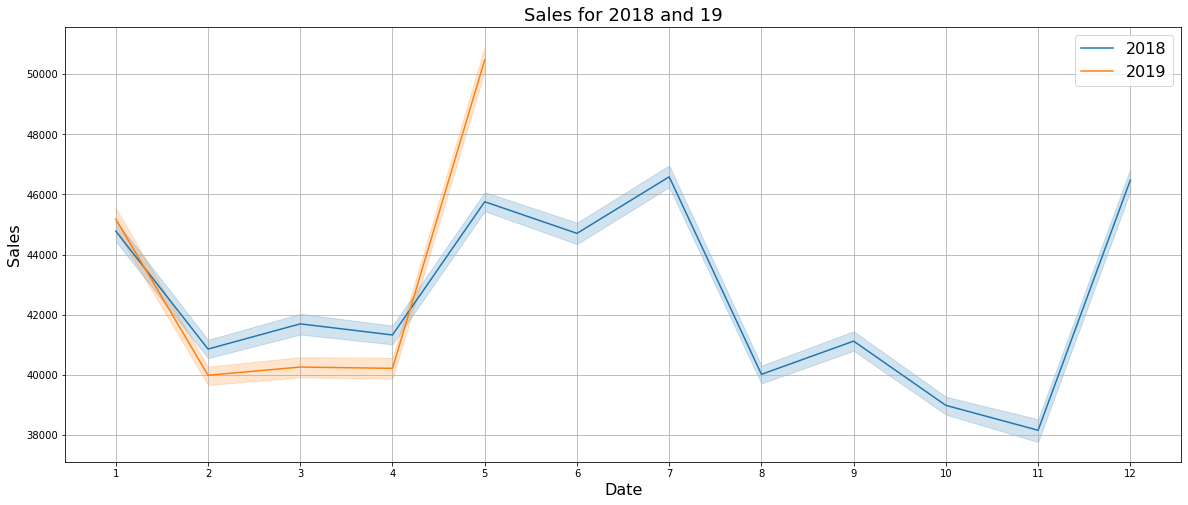

In [11]:
# plotting 2018 and 2019 sales data
data_2018 = train[train["year"] == 2018]
data_2019 = train[train["year"] == 2019]
plt.figure(figsize=(20,8))
sns.lineplot(data_2018["month"], data_2018["Sales"])
sns.lineplot(data_2019["month"], data_2019["Sales"])
plt.grid()
plt.xticks(np.arange(1, 13, step=1))
plt.legend(['2018','2019'], loc='best', fontsize=16)
plt.title('Sales for 2018 and 19', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

In [12]:
# checking the range of date for 2018 and 2019
print("Min and max date for 2018: ", min(data_2018["Date"]),max(data_2018["Date"]))
print("Min and max date for 2019: ", min(data_2019["Date"]),max(data_2019["Date"]))

Min and max date for 2018:  2018-01-01 00:00:00 2018-12-31 00:00:00
Min and max date for 2019:  2019-01-01 00:00:00 2019-05-31 00:00:00


In [13]:
# ADF and KPSS Test

from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [14]:
# performing adf test
adf_test(train['Sales'])

Results of Dickey-Fuller Test:
Test Statistic                -1.289493e+01
p-value                        4.369095e-24
#Lags Used                     8.000000e+01
Number of Observations Used    1.882590e+05
Critical Value (1%)           -3.430385e+00
Critical Value (5%)           -2.861555e+00
Critical Value (10%)          -2.566778e+00
dtype: float64


In [15]:
-1.289493e+01 < -3.430385e+00
# 4.369095e-24 < 0.05
# test-statistic less than critical value which means series is stationary

True

In [16]:
# performing kpss test
kpss_test(train['Sales'])

Results of KPSS Test:
Test Statistic            1.47159
p-value                   0.01000
Lags Used                80.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


C:\Users\sanch\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [17]:
1.47159 > 0.34700
# test-statistics greater than critical value, which means series is not stationary

True

In [18]:
# # differencing
# train['Sales_dif'] = train['Sales'] - train['Sales'].shift(1)

In [19]:
# # plotting data
# plt.figure(figsize=(20,8))
# sns.lineplot(train["Date"], train["Sales"])
# sns.lineplot(train["Date"], train["Sales_dif"])
# plt.grid()
# # plt.legend(['actual','d=1'], loc='best', fontsize=16)
# plt.ylabel('Sales', fontsize=16)
# plt.xlabel('Date', fontsize=16)
# plt.show()

In [20]:
# adf_test(train['Sales_dif'].dropna())

In [21]:
# kpss_test(train['Sales_dif'].dropna())

In [22]:
# ACF and PACF plots

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

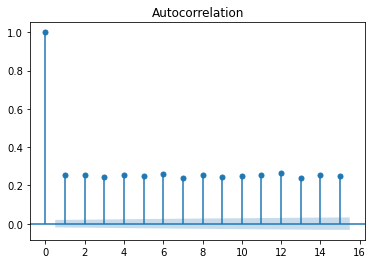

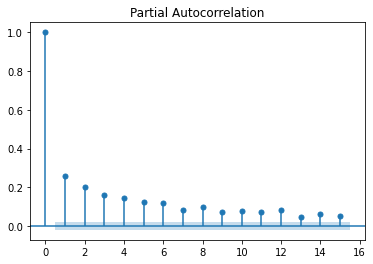

In [24]:
plot_acf(train['Sales'][:10000].dropna(), lags=15)
plot_pacf(train['Sales'][:10000].dropna(), lags=15)
plt.show()

In [25]:
# d=0, p=1, q=1

In [26]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(train['Sales'], order=(1,0,1))
model_fit = model.fit()

MemoryError: Unable to allocate 264. GiB for an array with shape (188261, 188261) and data type float64

In [27]:
# weekday and weekend
train['day_no'] = train['Date'].dt.weekday
train['weekend'] = "No"
train['weekend'].loc[train[train['day_no'] > 4].index] = "Yes"

In [28]:
# Columns
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'week', 'month', 'year',
       'day_no', 'weekend'],
      dtype='object')

In [29]:
# Cat and Cont EDA

In [30]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')


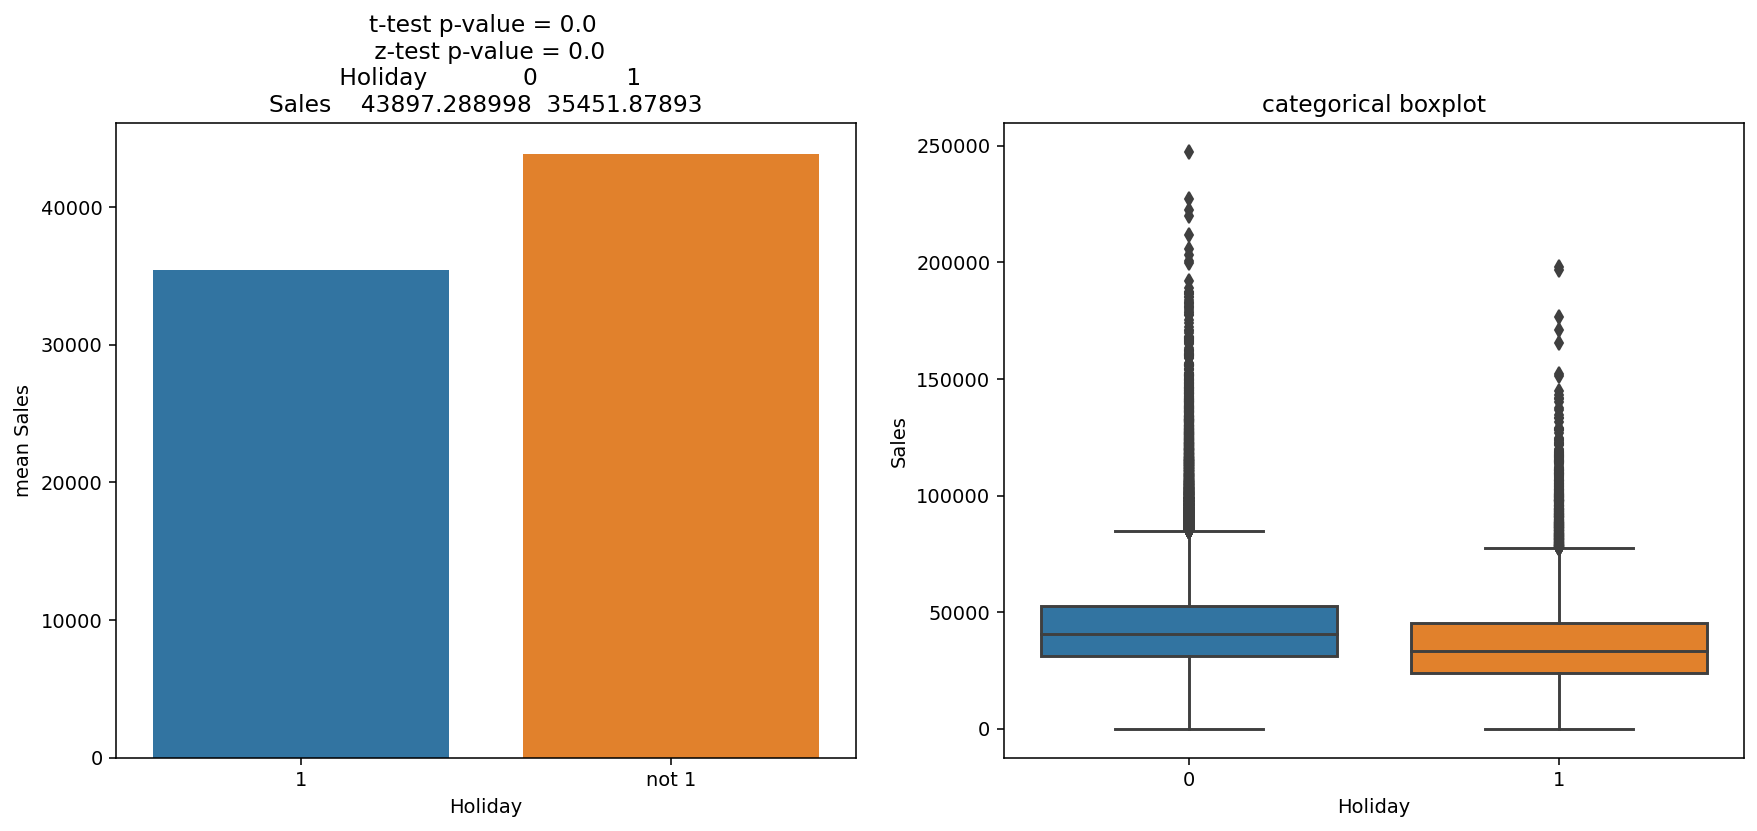

In [31]:
# Holiday
Bivariate_cont_cat(train, 'Sales', 'Holiday', 1)
train['Holiday'] = train['Holiday'].map({1: "Yes", 0:"No"})

In [32]:
# We can say that on holiday, Sales is higher

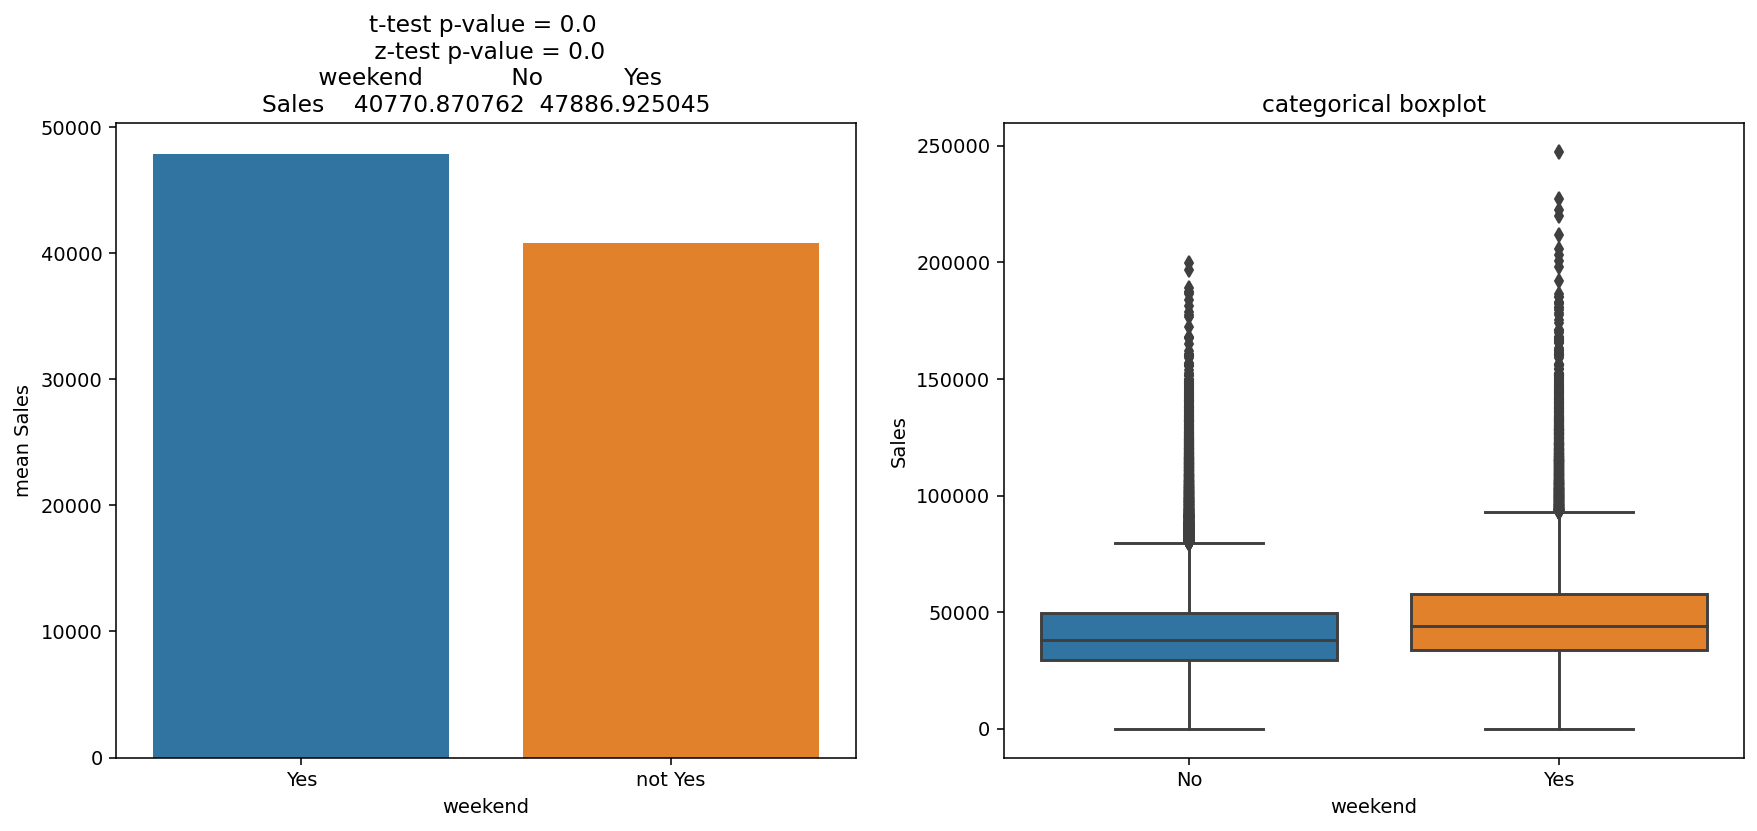

In [33]:
# weekend
Bivariate_cont_cat(train, 'Sales', 'weekend', "Yes")

In [34]:
# Sales on weekend is generally higher

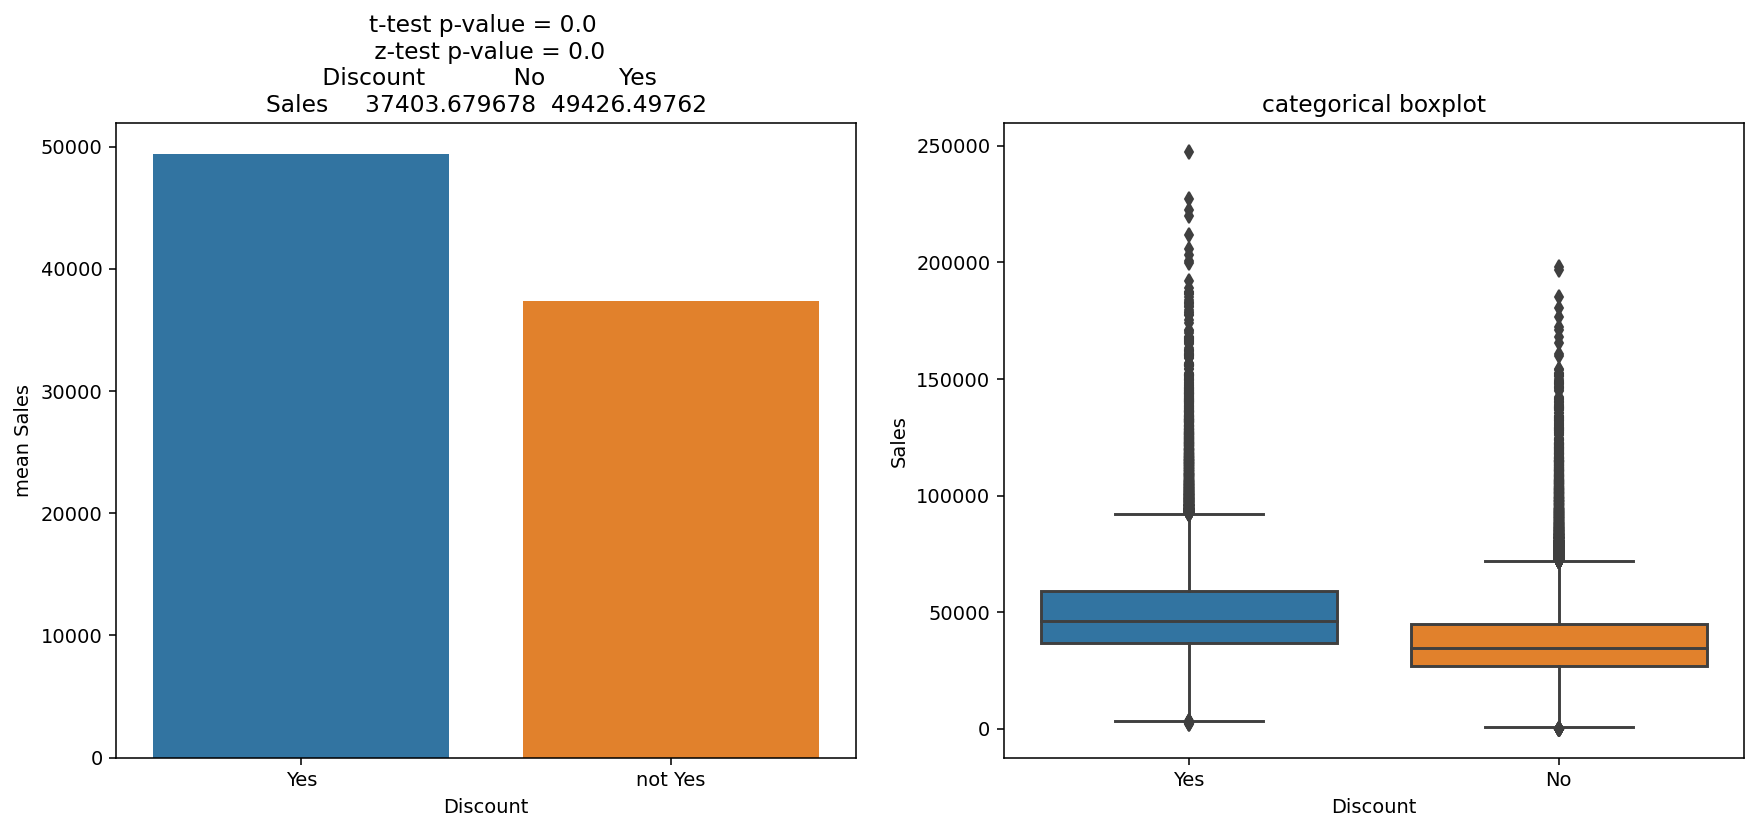

In [35]:
# Discount
Bivariate_cont_cat(train, 'Sales', 'Discount', "Yes")

In [36]:
# With discount yes, sales is higher

In [37]:
# Store_Type
pd.pivot_table(data=train, values='Sales', columns='Store_Type', aggfunc = np.mean)

Store_Type,S1,S2,S3,S4
Sales,37676.511694,27530.828222,47063.068209,59945.685926


In [38]:
# Store type S4 has higher sales compared to others

In [39]:
# Store_Type
pd.pivot_table(data=train, values='Sales', columns='Location_Type', aggfunc = np.mean)

Location_Type,L1,L2,L3,L4,L5
Sales,41453.597889,59231.480373,33072.257756,29067.414313,25187.787261


In [40]:
# L2 location has significantly higher sales than one locations

In [41]:
# Store_Type
pd.pivot_table(data=train, values='Sales', columns='Region_Code', aggfunc = np.mean)

Region_Code,R1,R2,R3,R4
Sales,46765.488405,40054.847344,42144.517063,39743.434249


In [42]:
# Not much difference in the values for different region code

In [43]:
# store_id
train['Store_id'].nunique()

365

In [ ]:
# selecting columns

In [53]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'week', 'month', 'year',
       'day_no', 'weekend'],
      dtype='object')

In [54]:
x = train[['Store_Type', 'Location_Type', 'Holiday', 'Discount','weekend','month','Sales']]
x['month'] = x['month'].astype('category')

In [55]:
x

,Store_Type,Location_Type,Holiday,Discount,weekend,month,Sales
0,S1,L3,Yes,Yes,No,1,7011.84
1,S4,L2,Yes,Yes,No,1,51789.12
2,S3,L2,Yes,Yes,No,1,36868.20
3,S2,L3,Yes,Yes,No,1,19715.16
4,S2,L3,Yes,Yes,No,1,45614.52
...,...,...,...,...,...,...,...
188335,S2,L3,Yes,Yes,No,5,37272.00
188336,S4,L2,Yes,No,No,5,54572.64
188337,S1,L3,Yes,No,No,5,31624.56
188338,S3,L1,Yes,Yes,No,5,49162.41


In [56]:
# one hot encoding categorical values
x = pd.get_dummies(x)

In [57]:
x

,Sales,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,7011.84,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,51789.12,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36868.20,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19715.16,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45614.52,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,37272.00,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
188336,54572.64,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
188337,31624.56,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
188338,49162.41,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
# x and y
y = x['Sales']
x = x.drop('Sales', axis=1)

x.shape, y.shape

((188340, 27), (188340,))

In [60]:
# divinding for train and test
x_train = x[:int(0.8*len(x))]
y_train = y[:int(0.8*len(y))]

x_test = x[int(0.8*len(x)):]
y_test = y[int(0.8*len(y)):]

In [61]:
# import xgboost and msle
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(x_train, y_train)

preds = xg_reg.predict(x_test)

msle = mean_squared_log_error(y_test, preds)*1000
print(msle)

[23:08:44] WARNING: d:\bld\xgboost-split_1631904903843\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
271.11789465569575


In [97]:
from sklearn.ensemble import RandomForestRegressor

 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth = 7, max_features = 0.5)
  
# fit the regressor with x and y data
regressor.fit(x_train, y_train)

preds = regressor.predict(x_test)

msle = mean_squared_log_error(y_test, preds)*1000
print(msle)


117.35612711154411


In [92]:
parameter_grid = {
    'max_depth' : [4,5,6,7],
    'max_features': [0.5, 0.7]
    }

from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=regressor, param_grid=parameter_grid, scoring='neg_mean_squared_error', cv=10)

gridsearch.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7], 'max_features': [0.5, 0.7]},
             scoring='neg_mean_squared_error')

In [93]:
gridsearch.best_params_

{'max_depth': 7, 'max_features': 0.5}

In [79]:
# training on whole data
xg_reg.fit(x, y)

[23:10:59] WARNING: d:\bld\xgboost-split_1631904903843\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
regressor.fit(x,y)

RandomForestRegressor(random_state=0)

In [68]:
# preparing test
test = pd.read_csv("TEST_FINAL.csv")

In [69]:
#typecasting date column
test["Date"] = pd.to_datetime(test["Date"], format="%Y-%m-%d")

# year and week
test["week"] = test.Date.dt.week
test["month"] = test.Date.dt.month
test["year"] = test.Date.dt.year

# weekday and weekend
test['day_no'] = test['Date'].dt.weekday
test['weekend'] = "No"
test['weekend'].loc[test[test['day_no'] > 4].index] = "Yes"

In [70]:
#null check
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
week             0
month            0
year             0
day_no           0
weekend          0
dtype: int64

In [71]:
#mapping and changing data type
test['Holiday'] = test['Holiday'].map({1: "Yes", 0:"No"})
test['month'] = test['month'].astype('category')

In [72]:
# selecting column from test
test = test[['Store_Type', 'Location_Type', 'Holiday', 'Discount','weekend','month','ID']]

In [73]:
# one hot encoding categorical values
test = pd.get_dummies(test, columns=['Store_Type', 'Location_Type', 'Holiday', 'Discount','weekend','month'])

In [75]:
test['month_1'] = 0
test['month_2'] = 0
test['month_3'] = 0
test['month_4'] = 0
test['month_5'] = 0
test['month_8'] = 0
test['month_9'] = 0
test['month_10'] = 0
test['month_11'] = 0
test['month_12'] = 0

In [82]:
# predictions on test data
preds = xg_reg.predict(test.drop('ID',axis=1))

test['Sales'] = preds

output = test[['ID','Sales']]

output.to_csv('output.csv', index=False)

In [87]:
# predictions on test data
preds = regressor.predict(test.drop(['ID','Sales'],axis=1))

test['Sales'] = preds

output = test[['ID','Sales']]

output.to_csv('output_rf.csv', index=False)